In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'E:\subjects cs 4\course AI\datasets\Mall customer.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, [3, 4]].values

C:\Users\Khater\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


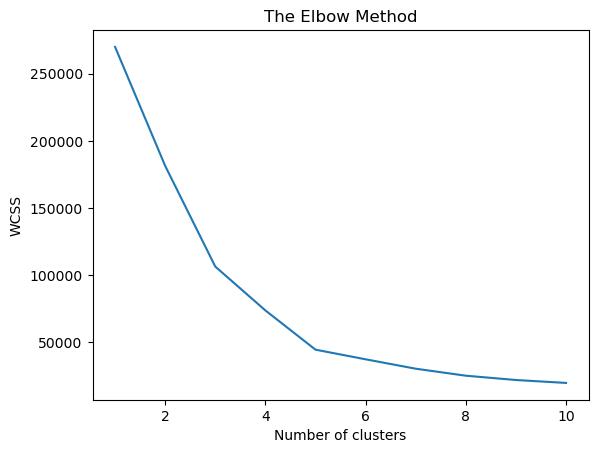

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)

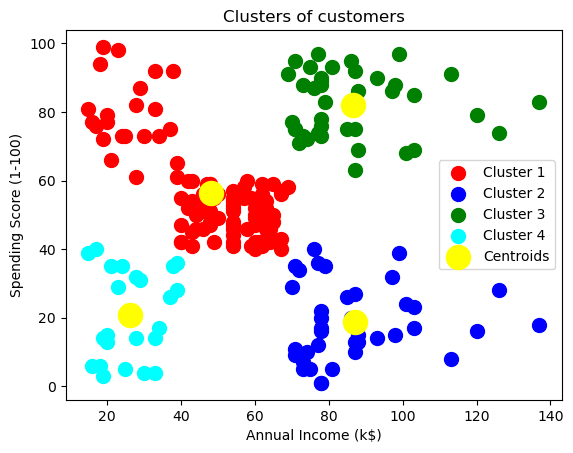

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

NameError: name 'kmeans_labels' is not defined

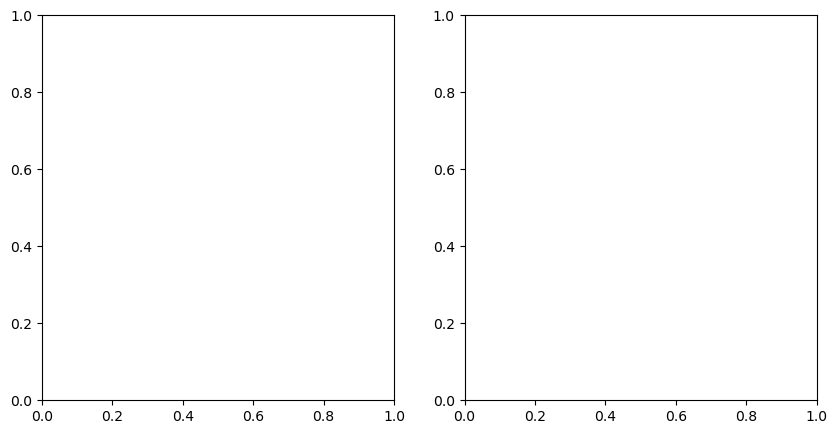

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(df.iloc[:, 3], df.iloc[:, 4], c=kmeans_labels)
axs[0].set_title('K-means Clustering')

axs[1].scatter(df.iloc[:, 3], df.iloc[:, 4], c=dbscan_labels)
axs[1].set_title('DBSCAN Clustering')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print('The average silhouette score is:', silhouette_avg)

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.2, min_samples=3)
clusters = dbscan.fit_predict(scaled_data)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Choose the number of components
pca_data = pca.fit_transform(X)

In [12]:
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan_clusters = dbscan.fit_predict(pca_data)

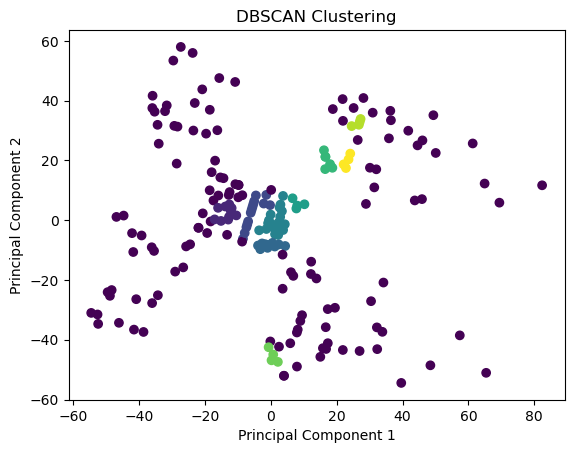

In [14]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()